# Visualizations for ECE 143 Final Project

## MAKEUP PRODUCT CATEGORIZATION FOR E-COMMERCE APPLICATIONS


Group 17 - Swapnil Sinha, Pragnya Pathak, Xin Pan, Avanti Bhandarkar, Yuyang Wu


## Package installations

In [55]:
!pip install wordcloud

## Libraries

In [18]:
#Standard libraries
import numpy as np
import pandas as pd
import string
import re
import collections
from collections import Counter, defaultdict
import pickle
import warnings
warnings.filterwarnings("ignore")

import spacy.cli
spacy.cli.download("en_core_web_lg")

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import gensim.corpora as corpora

In [6]:
#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim

#ML/DL
import tensorflow_hub as hub
#from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

## Helper functions

In [20]:
def list_count(lst):
  '''
  Counts the occurrences of unique elements in the given list.

  Parameters:
  input: lst --> list): Input list containing elements to be counted.

  Returns:
  list: A list of dictionaries where each dictionary contains a unique element
        from the input list as the key and its corresponding count as the value.
        The list is sorted in descending order based on element counts.
  '''
  dic_counter = collections.Counter()
  for x in lst:
      dic_counter[x] += 1
  dic_counter = collections.OrderedDict(
                    sorted(dic_counter.items(),
                    key=lambda x: x[1], reverse=True))
  list_count = [ {key:value} for key,value in dic_counter.items() ]
  return list_count

In [11]:
def ner_features(lst_dics_tuples, tag):
  '''
  Performs the following operations to clean the given text data:
  - text to str
  - converts all characters to lowercased
  - removes non-alphanumeric characters
  - removes stopwords
  - lemmatization

  Parameters
  input: text --> pd.Series
  output: text --> str
  '''
  if len(lst_dics_tuples) > 0:
      tag_type = []
      for dic_tuples in lst_dics_tuples:
          for tuple in dic_tuples:
              type, n = tuple[1], dic_tuples[tuple]
              tag_type = tag_type + [type]*n
              dic_counter = collections.Counter()
              for x in tag_type:
                  dic_counter[x] += 1
      return dic_counter[tag]
  else:
      return 0

## Wordcloud visualization

In [12]:
# Load data
df = pd.read_csv('/content/cleaned_makeup.csv')
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.dropna()

brand                                            name  \
0     colourpop                                   Lippie Pen  l   
1     colourpop                                     Blotted Lip   
2     colourpop                                     Lippie Stix   
3     colourpop                            No Filter Foundation   
4         boosh                                        Lipstick   
..          ...                                             ...   
872      milani  Milani Color Statement Moisture Matte Lipstick   
873      milani                 Milani Color Statement Lipstick   
874      revlon                   Revlon ColorBurst Matte Balm    
875      e.l.f.             e.l.f. Studio Moisturizing Lipstick   
876  pure anada               Pure Anada Petal Perfect Lipstick   

                                           description  category product_type  \
0    Lippie Pen  l A long-wearing and high-intensit...    pen  l    lip_liner   
1    Blotted Lip Sheer matte lipstick that creates ...  lipstick     lipstick   
2    Lippie Stix Formula contains Vitamin E, Mango,...  lipstick     lipstick   
3    Developed for the Selfie Age, our buildable fu...    liquid   foundation   
4    All of our products are free from lead and hea...  lipstick     lipstick   
..                                                 ...       ...          ...   
872  Inspired by the Milan Runway, eight new matte ...  lipstick     lipstick   
873  Inspired by the Milan Runway, eight new matte ...  lipstick     lipstick   
874  Revlon ColorBurst Matte Balm offers velvety co...  lipstick     lipstick   
875  The velvety, satin texture of e.l.f. Studio Mo...  lipstick     lipstick   
876  Pure Anada Petal Perfect Lipstick is a moistur...  lipstick     lipstick   

                                          cleaned_desc  
0    lippie pen  l long wearing high intensity lip ...  
1    blotted lip sheer matte lipstick creates perfe...  
2    lippie stix formula contains vitamin mango avo...  
3    developed selfie age buildable full coverage n...  
4    product free lead heavy metal parabens phthala...  
..                                                 ...  
872  inspired milan runway eight new matte shade tw...  
873  inspired milan runway eight new matte shade tw...  
874  revlon colorburst matte balm offer velvety col...  
875  velvety satin texture studio moisturizing lips...  
876  pure anada petal perfect lipstick moisture int...  

[488 rows x 6 columns]

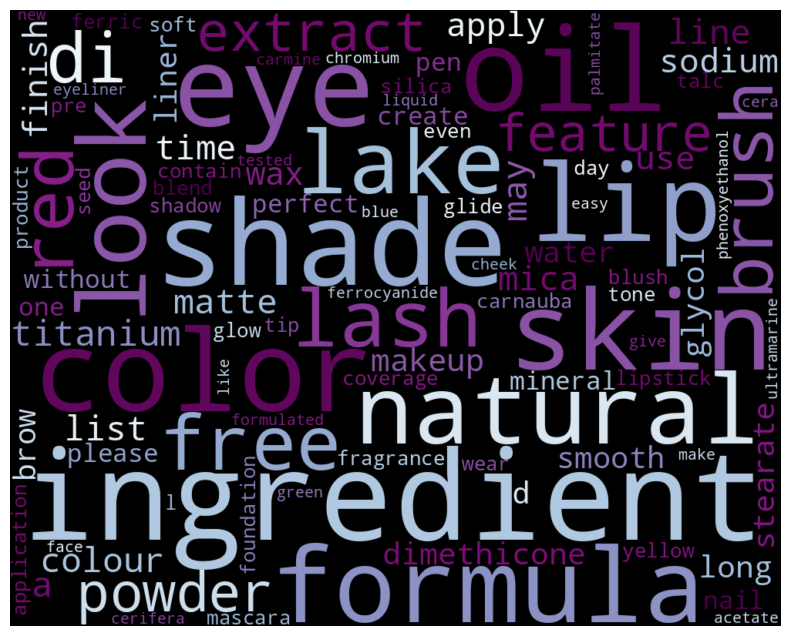

In [14]:
descrip = df.cleaned_desc
allwords = []
for d in descrip:
    try:
        words = d.split()
        allwords.extend(words)
    except:
        pass

word_count = Counter(allwords)
data_dict = dict(word_count)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=800, max_words=100, colormap = 'BuPu').generate_from_frequencies(data_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.savefig('wordcloud.png', bbox_inches='tight', pad_inches=0)
plt.show()

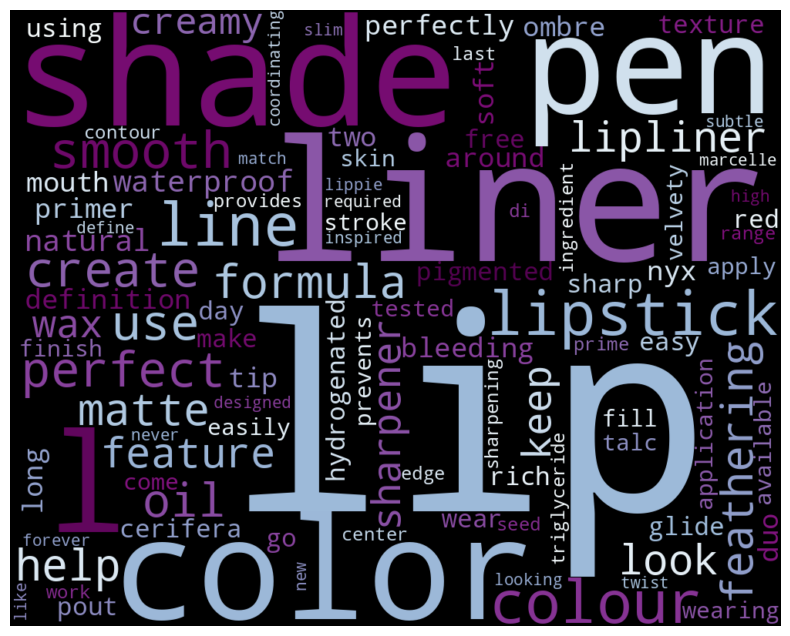

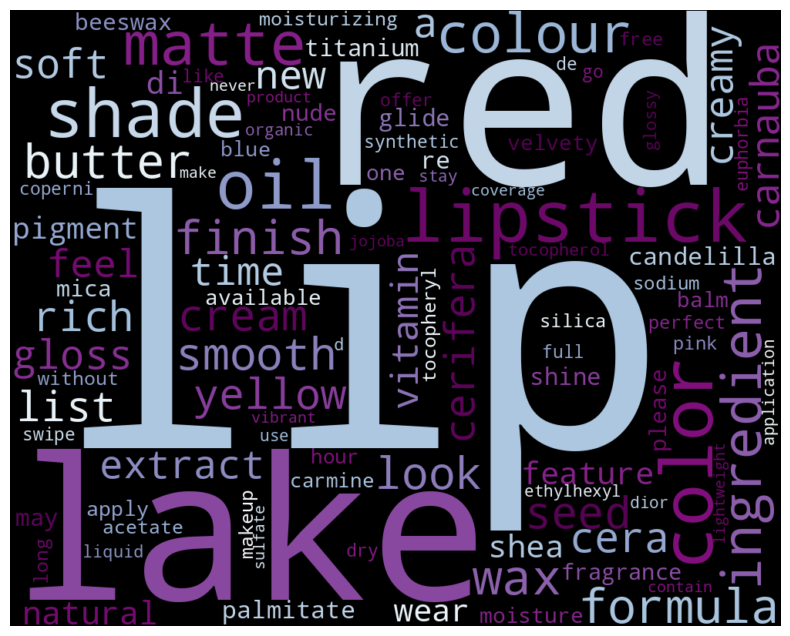

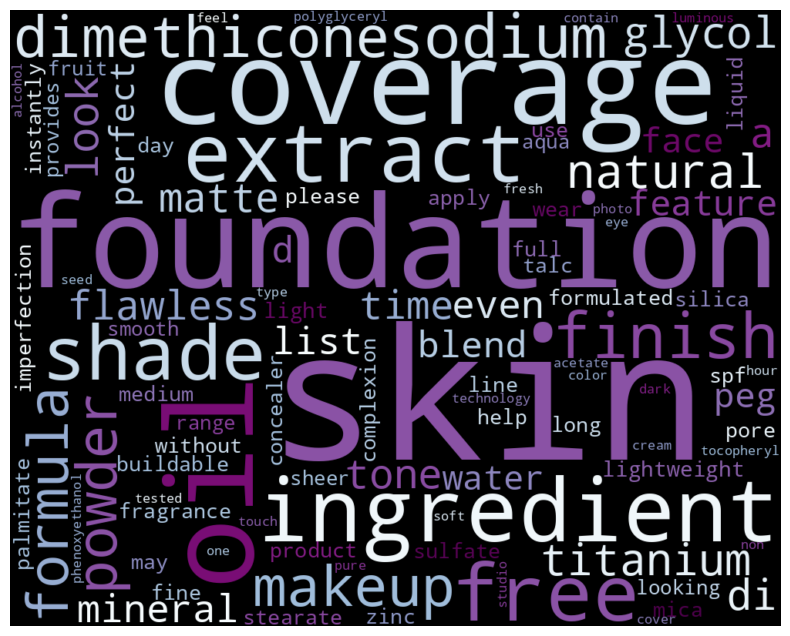

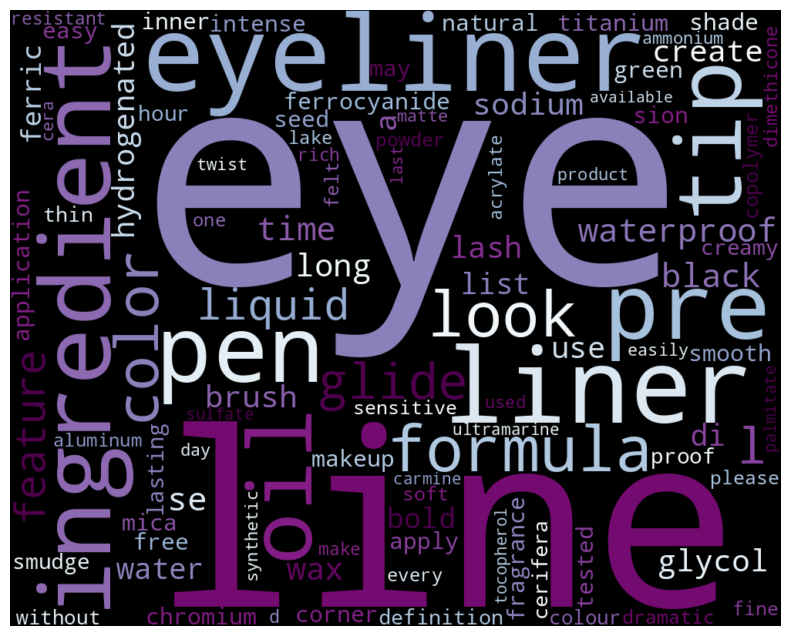

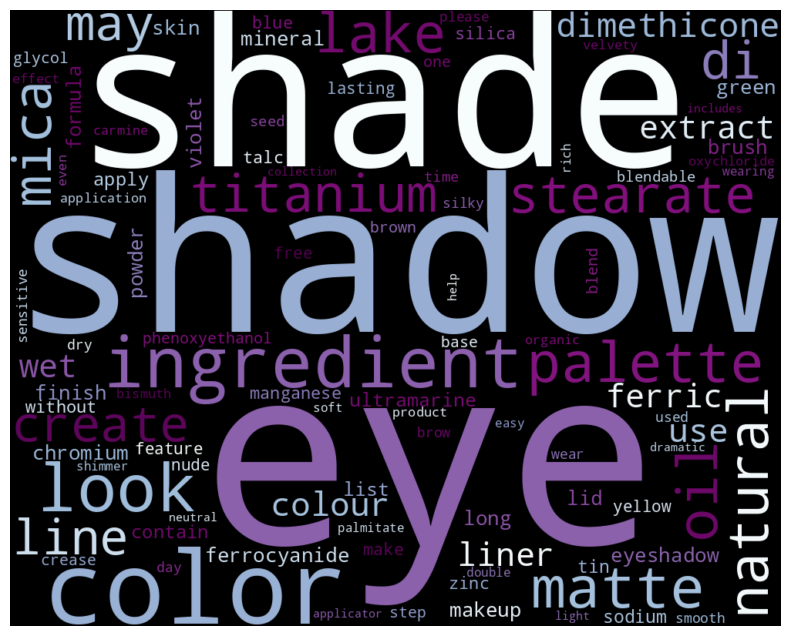

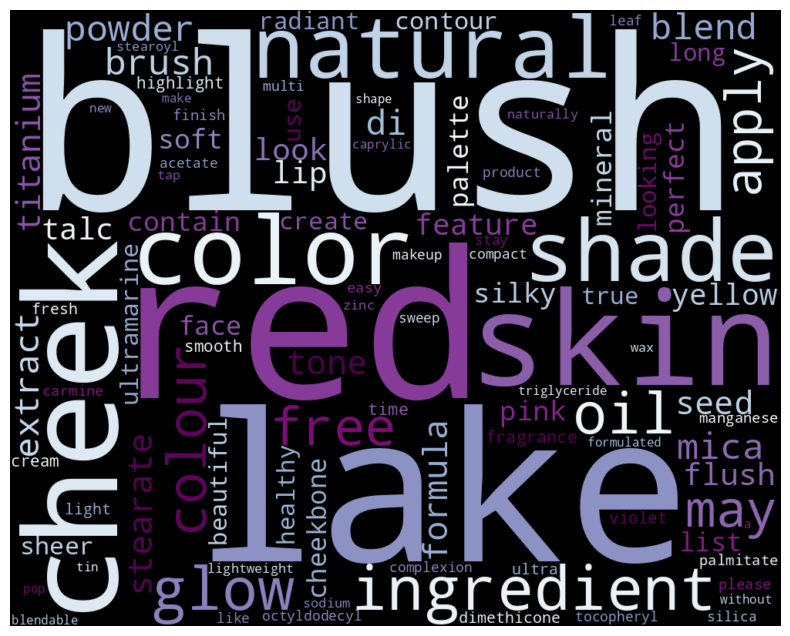

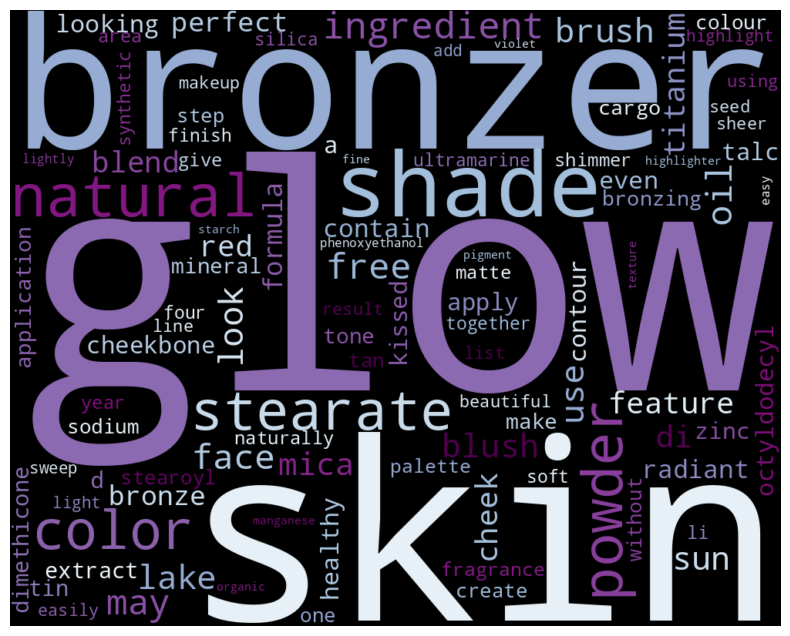

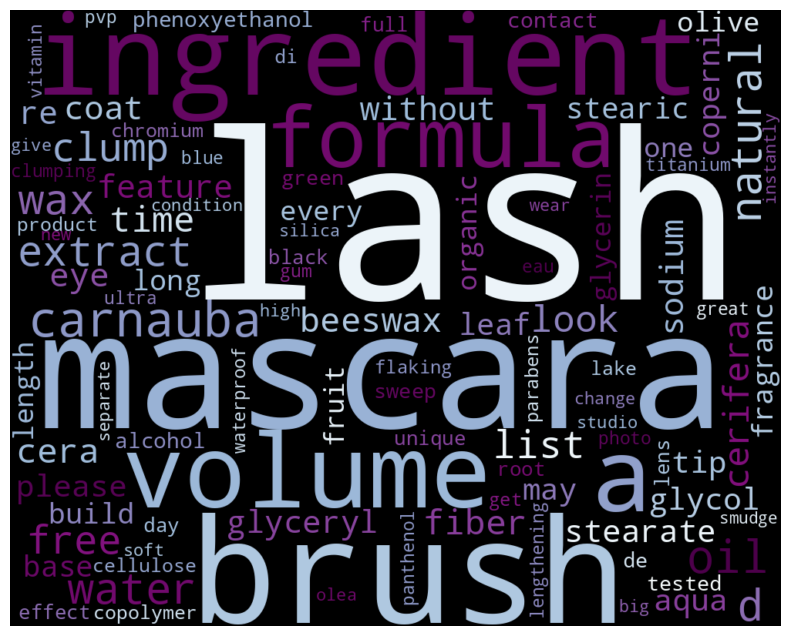

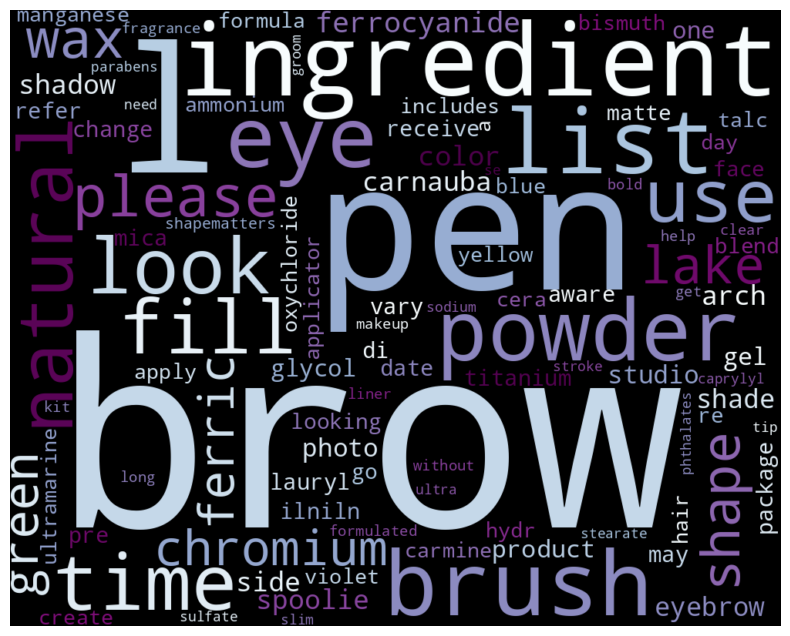

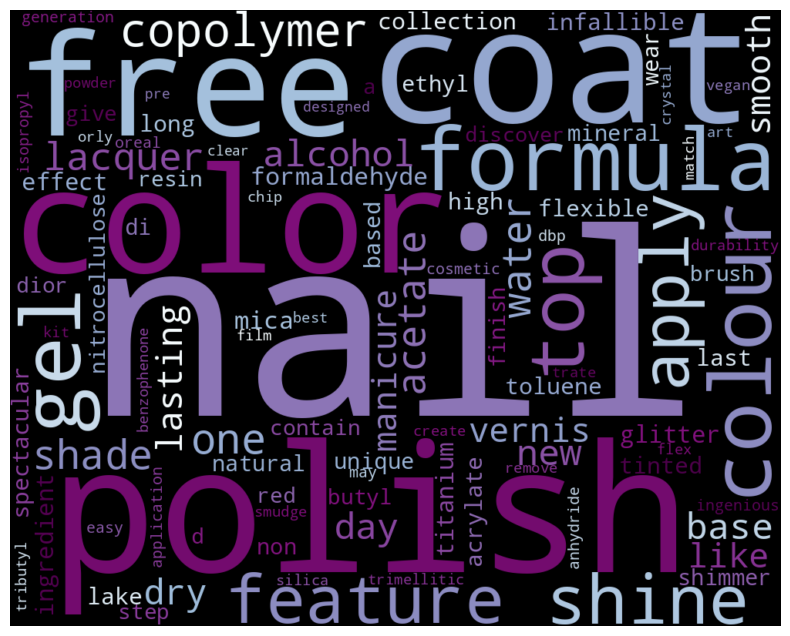

In [15]:
allwords_type = defaultdict(list)
for d in df.iterrows():
    try:
        words = d[1]['cleaned_desc'].split()
        allwords_type[d[1]['product_type']].extend(words)
    except:
        pass

for k,v in allwords_type.items():
    c = Counter(v)
    wordcloud = WordCloud(width=1000, height=800, max_words=100, colormap = 'BuPu').generate_from_frequencies(c)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.savefig(f'{k}_wordcloud.png', bbox_inches='tight', pad_inches=0)

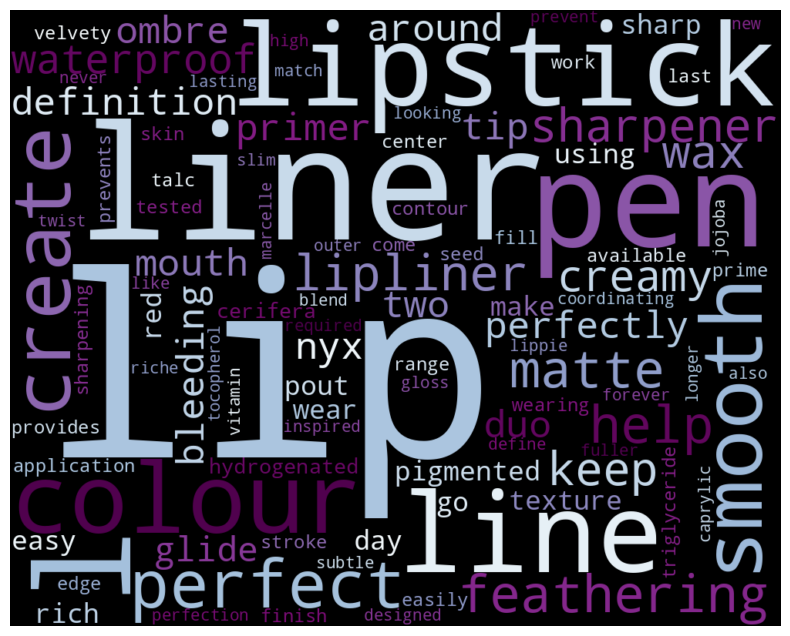

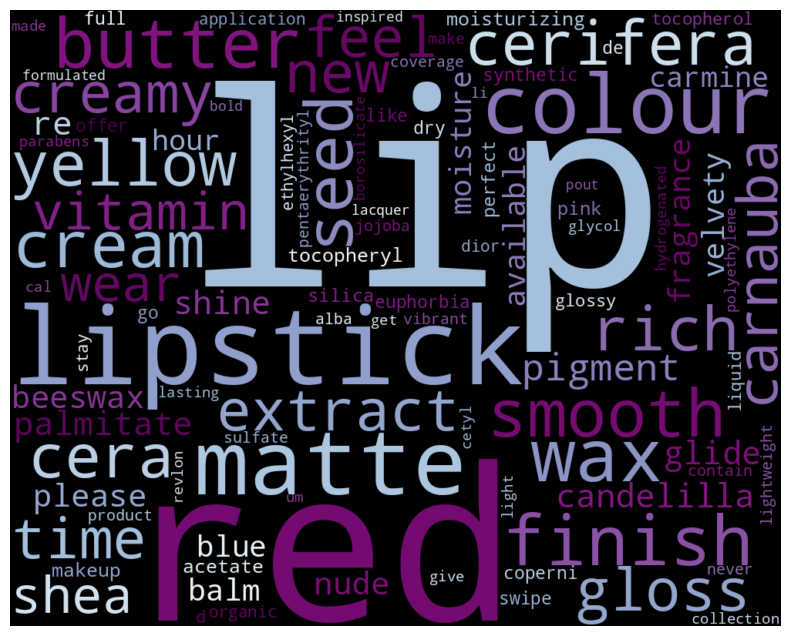

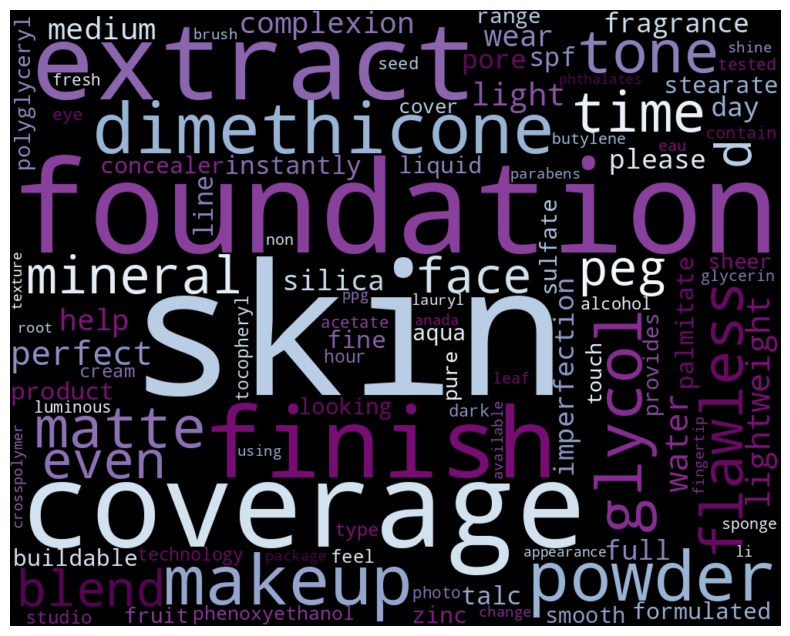

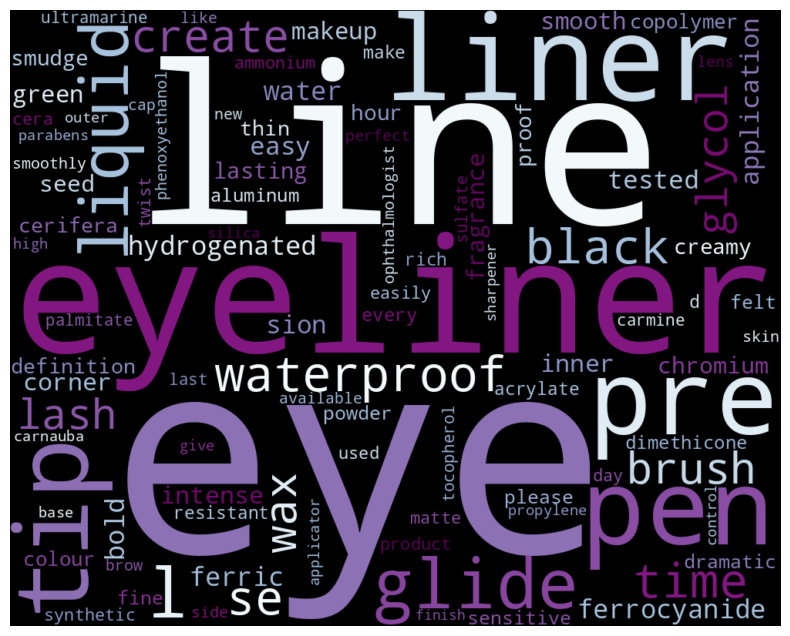

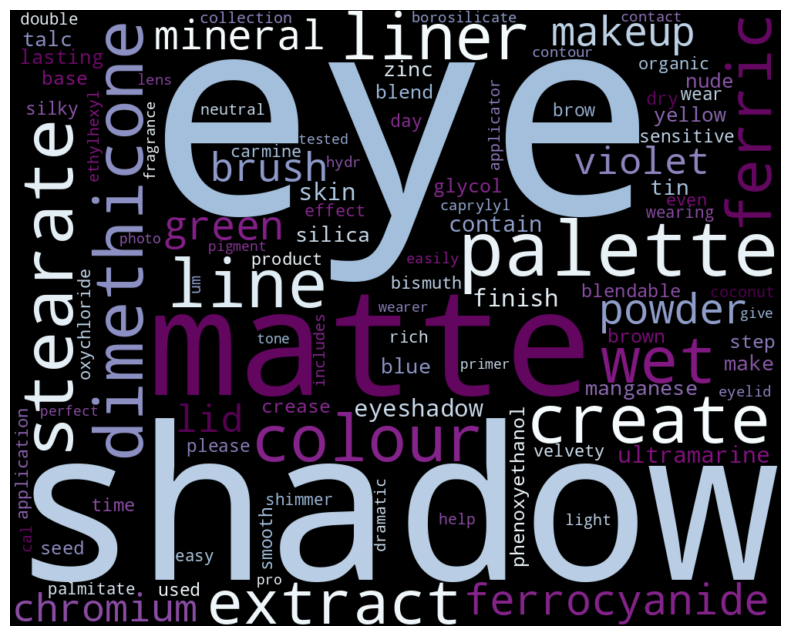

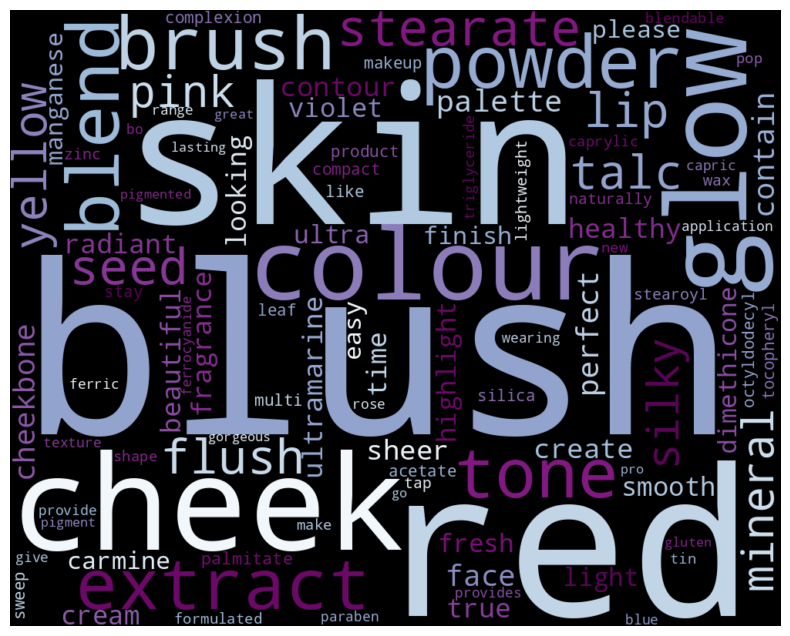

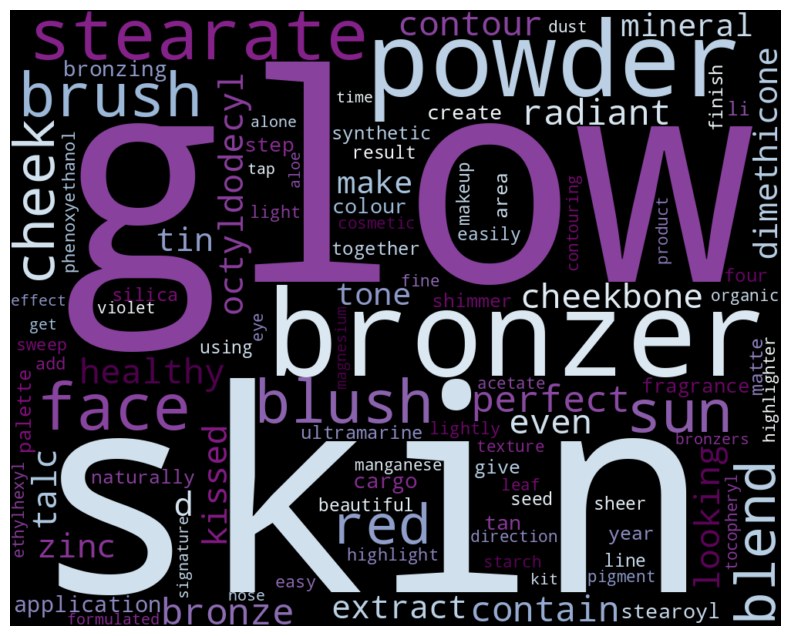

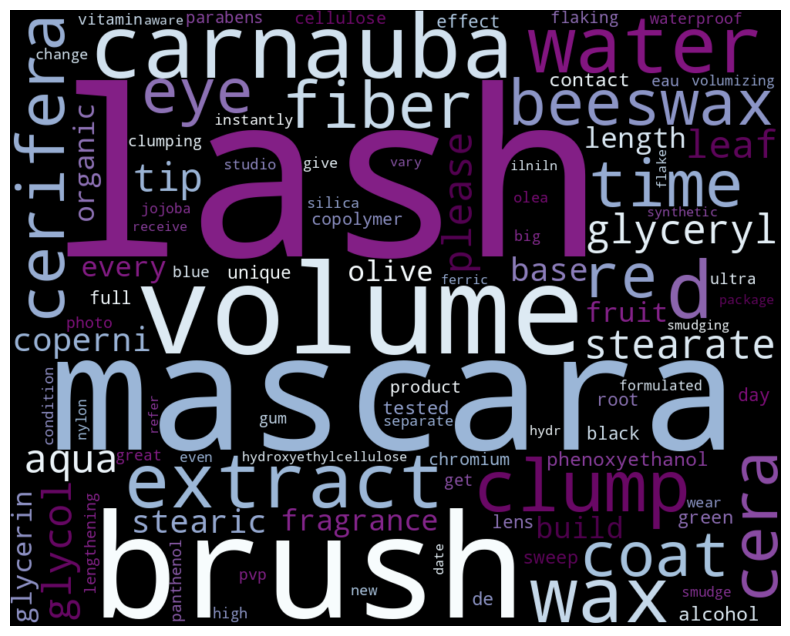

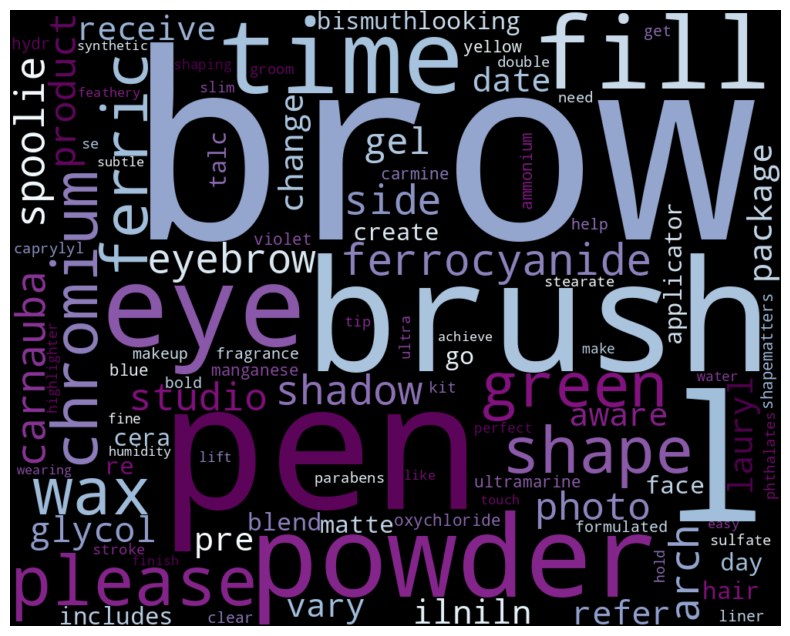

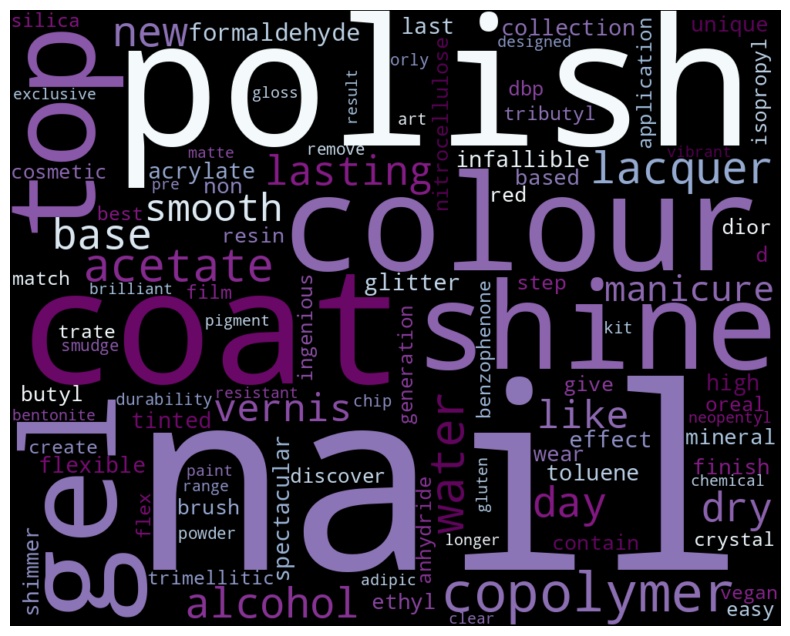

In [16]:
keys = []
for k,v in allwords_type.items():
    c = Counter(v)
    c = dict(sorted(c.items(), key=lambda item: item[1],reverse=True))
    keys.extend(list(c.keys())[:100])

keysc = Counter(keys)
keysc = dict(sorted(keysc.items(), key=lambda item: item[1], reverse=True))
same_words = {key for key, value in keysc.items() if value > 7}

for k,v in allwords_type.items():
    c = Counter(v)
    for k in same_words:
        c.pop(k,None)

    wordcloud = WordCloud(width=1000, height=800, max_words=100, colormap = 'BuPu').generate_from_frequencies(c)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear', cmap = 'BuPu')
    plt.axis('off')  # Hide the axes

## Feature extraction and engineering

In [21]:
ner = spacy.load('en_core_web_lg')

In [22]:
# Perform Named Entity Recognition (NER)

df['tags'] = df['cleaned_desc'].apply(lambda x: [(tag.text, tag.label_) for tag in ner(x).ents] )
df['tags'] = df['tags'].apply(lambda x: list_count(x))

tags_set = []
for lst in df['tags'].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df['tags_'+feature] = df['tags'].apply(lambda x: ner_features(x, feature))

In [24]:
# Don't rerun - Visualisation of entity tagging Loreal ... Paris

doc = ner('This lipstick from Loreal is made in Paris. It has five oils added to it for rich and intense colour payoff.')
spacy.displacy.render(doc, style="ent", page=True)

#Paste the obtained HTML code here to visualize: https://html.onlineviewer.net/

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <title>displaCy</title>\n    </head>\n\n    <body style="font-size: 16px; font-family: -apple-system, BlinkMacSystemFont, \'Segoe UI\', Helvetica, Arial, sans-serif, \'Apple Color Emoji\', \'Segoe UI Emoji\', \'Segoe UI Symbol\'; padding: 4rem 2rem; direction: ltr">\n<figure style="margin-bottom: 6rem">\n<div class="entities" style="line-height: 2.5; direction: ltr">This lipstick from \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Loreal\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n is made in \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Paris\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; v

In [25]:
# Don't rerun - Visualisation of entity tagging - Loreal Paris

doc = ner('This lipstick from Loreal Paris has five oils added to it for rich and intense colour payoff.')
spacy.displacy.render(doc, style="ent", page=True)

#Paste the obtained HTML code here to visualize: https://html.onlineviewer.net/

'<!DOCTYPE html>\n<html lang="en">\n    <head>\n        <title>displaCy</title>\n    </head>\n\n    <body style="font-size: 16px; font-family: -apple-system, BlinkMacSystemFont, \'Segoe UI\', Helvetica, Arial, sans-serif, \'Apple Color Emoji\', \'Segoe UI Emoji\', \'Segoe UI Symbol\'; padding: 4rem 2rem; direction: ltr">\n<figure style="margin-bottom: 6rem">\n<div class="entities" style="line-height: 2.5; direction: ltr">This lipstick from \n<mark class="entity" style="background: #7aecec; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Loreal Paris\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">ORG</span>\n</mark>\n has \n<mark class="entity" style="background: #e4e7d2; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    five\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; ver

Ngram  (1, 1)
Perplexity  30


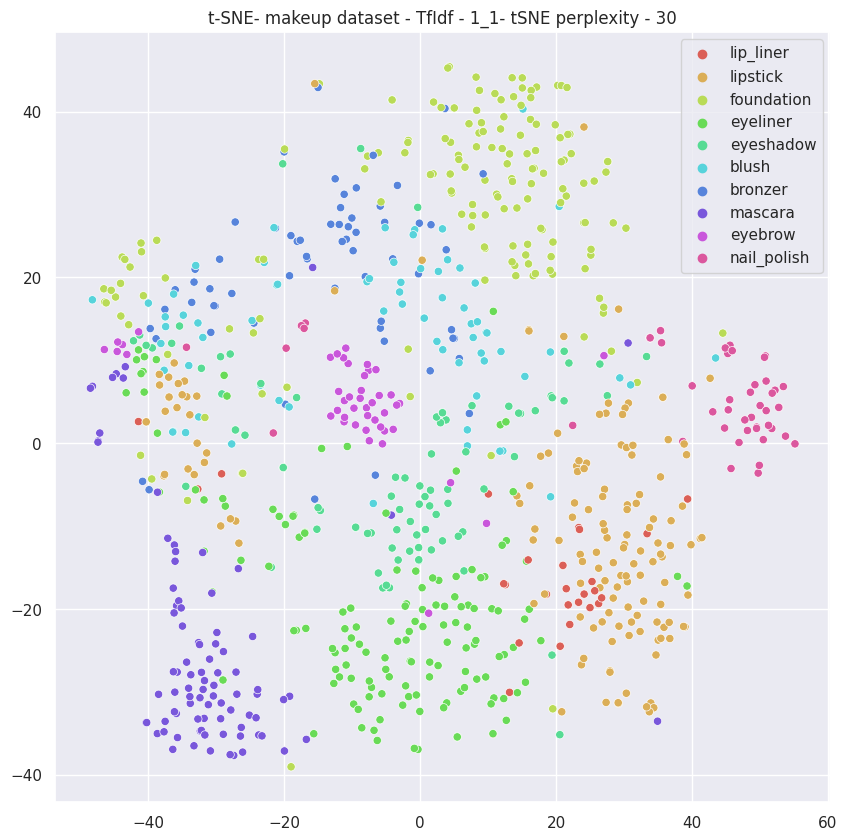

Ngram  (1, 3)
Perplexity  30


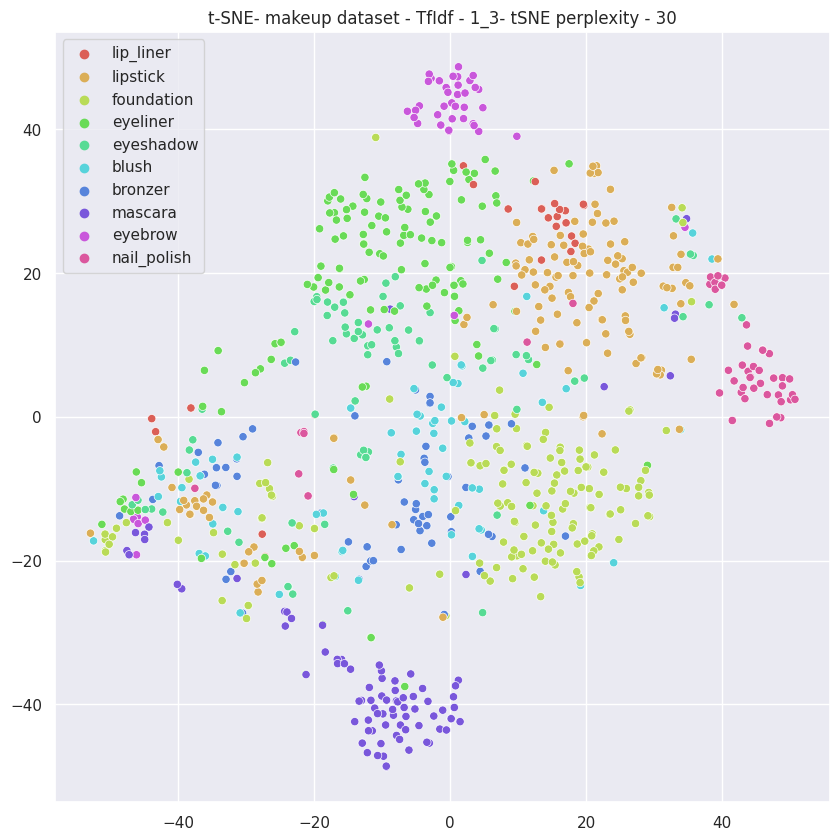

In [51]:
# Calculate Tf-IDf (term frequency-inverse document frequency)
# and display tSNE visualization

i = 30
perp_components = defaultdict(dict)
for ngram in [(1,1),(1,3)]:
    vectorizer = TfidfVectorizer(ngram_range=ngram, max_features= 2**10)
    text_to_vector = vectorizer.fit_transform(df.cleaned_desc.values)
    print('Ngram ',ngram )
    print('Perplexity ', i)
    X_embedded = TSNE(perplexity=i,init='random').fit_transform(text_to_vector)
    ngram_str = str(ngram[0])+'_'+str(ngram[1])
    perp_components[i][ngram_str] = X_embedded
    # sns settings
    sns.set(rc={'figure.figsize':(10,10)})
    # colors
    palette = sns.color_palette('hls', len(set(df.product_type.values.tolist())))
    y = df.product_type.values.tolist()
    # plot
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette)
    title = 't-SNE- makeup dataset - TfIdf - '+ngram_str+'- tSNE perplexity - '+str(i)
    plt.savefig(title)
    plt.title(title)
    plt.show()

In [ ]:
#Universal Sentence Encoder - do not rerun after generating embeddings

embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder-large/5')
embeddings = embed(df['cleaned_desc'])
df['tsneuse'] = np.array(embeddings).tolist()

In [38]:
# Reload data if required
df = pd.read_csv('/content/withUSE.csv')

df[['x', 'y']] = df['tsneuse'].str.split(',', expand=True, n=1)
to_embed = []
for ind in df.index:
    X = df['x'][ind]
    df['x'][ind] = str(X).replace('[', '').replace(']', '')
    Y = df['y'][ind]
    df['y'][ind] = str(Y).replace('[', '').replace(']', '')
    to_embed.append((str(X).replace('[', '').replace(']', ''),str(Y).replace('[', '').replace(']', '')))

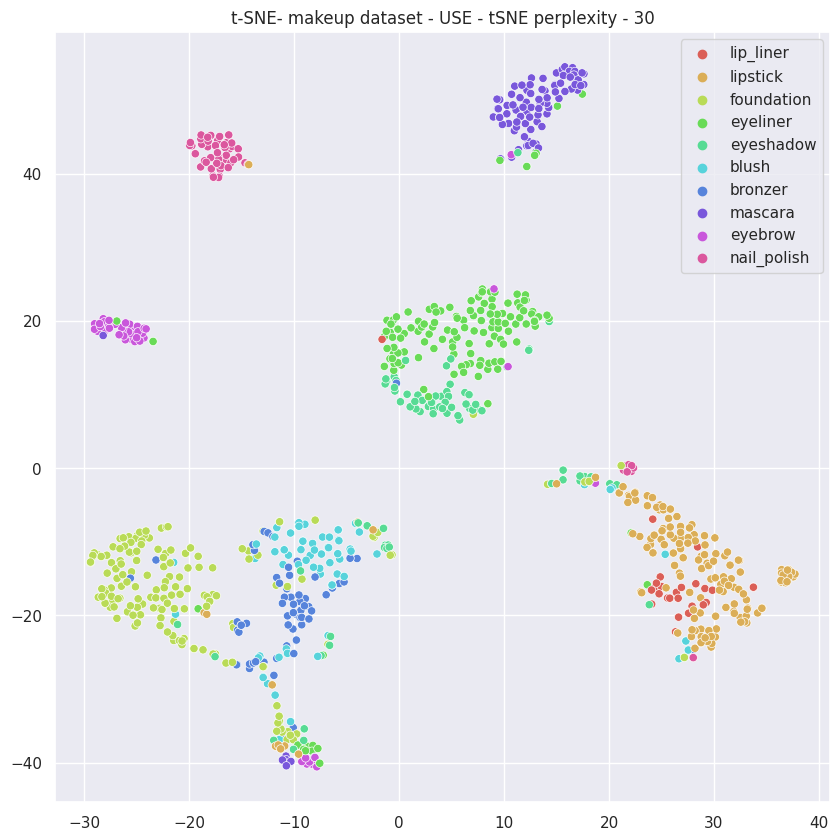

In [43]:
i = 30
X_embedded = TSNE(perplexity=i,init='random').fit_transform(np.array(to_embed))
# sns settings
sns.set(rc={'figure.figsize':(10,10)})
# colors
palette = sns.color_palette('hls', len(set(df.product_type.values.tolist())))
y = df.product_type.values.tolist()
# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette)
title = 't-SNE- makeup dataset - USE - tSNE perplexity - '+str(i)
plt.savefig(title)
plt.title(title)
plt.show()

In [ ]:
# Generate 'Bag of Words' features - did not use

vect = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,3))
corpus = df['cleaned_desc']
X = vect.fit_transform(corpus)
count_vect_df = pd.DataFrame(X.todense(), columns=vect.get_feature_names_out())
df = pd.concat([df, count_vect_df], axis=1)

drop_cols = df.iloc[:,17:].columns[(df.iloc[:,17:] != 0).sum() < 100]
df = df.drop(drop_cols, axis = 1)
df.drop(df.filter(regex='Unname'),axis=1, inplace=True)

## Stacked histogram for ppt

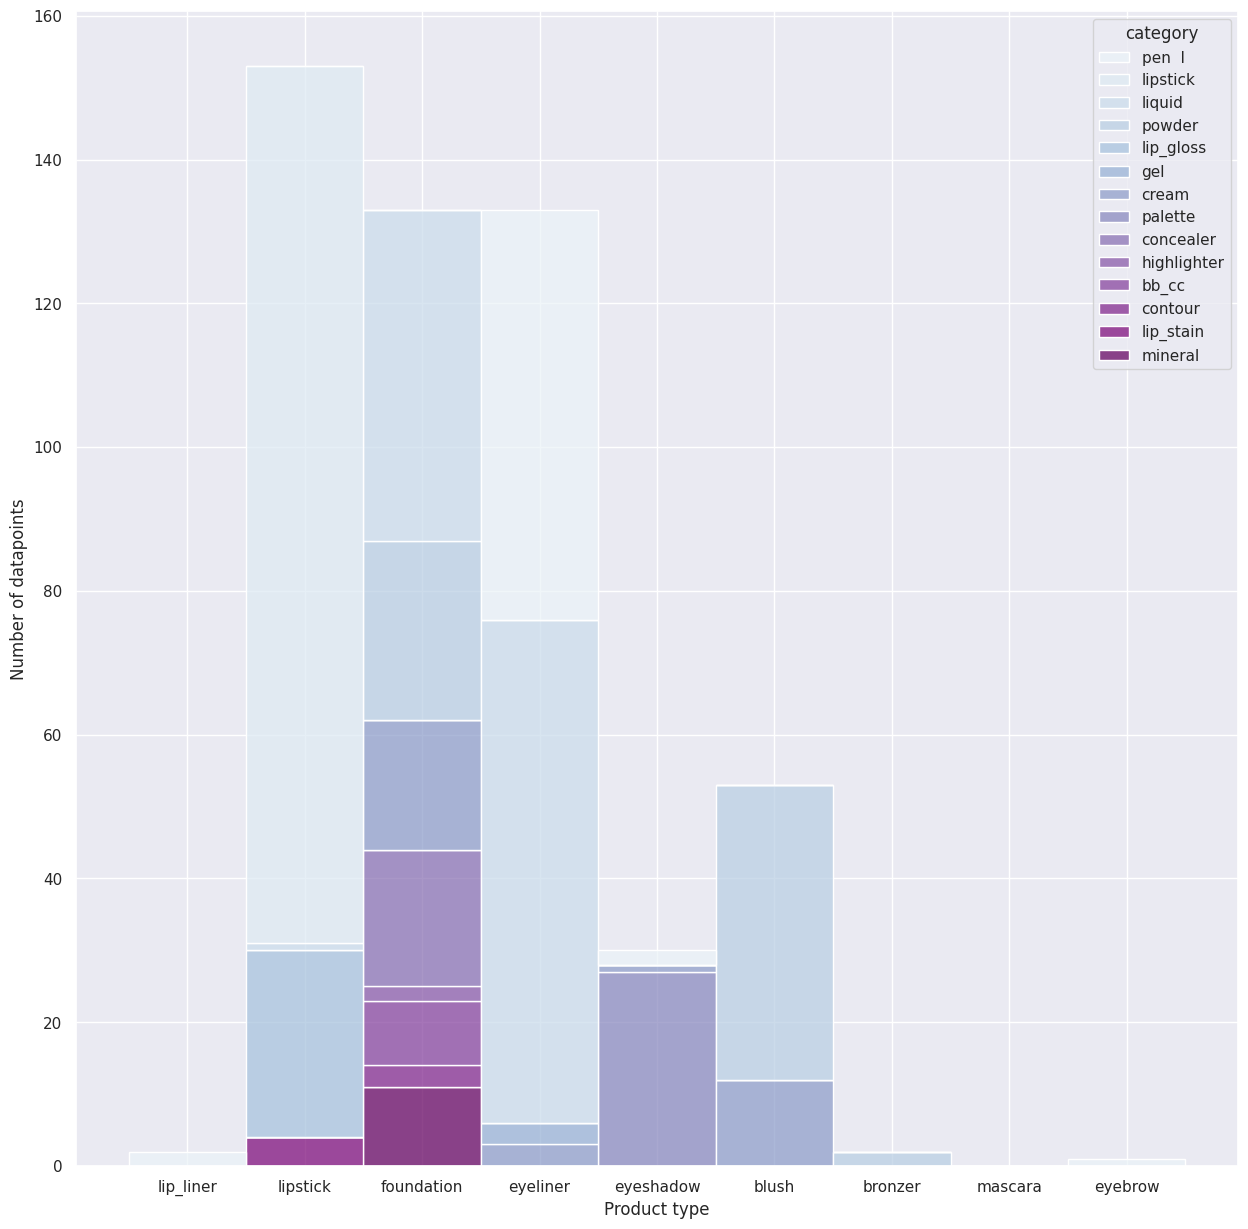

In [54]:
f, ax = plt.subplots(figsize=(15,15))
ax  = sns.histplot(data=df, x= 'product_type',hue = 'category',multiple = 'stack', palette = 'BuPu')
ax.set(xlabel='Product type', ylabel='Number of datapoints')
plt.show()